In [42]:
from VehicleDetection import VehicleDetection
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import copy
import statistics
from eval_utils import *
from video_utils import *
from load_utils import *
from background_remover import *

data_path = '../../AICity_data/train/S03/c010/'

In [77]:
means, stds = get_background_stats(data_path + 'vdo.avi', 1, 535) # 514 is the 25% of the frames

100%|█████████████████████████████████████████| 534/534 [00:08<00:00, 64.26it/s]


In [69]:
gt_detect = readDetectionsXML('ai_challenge_s03_c010-full_annotation.xml')
gt_notParked = getNotParkedCars(gt_detect)

In [76]:
singleGaussianDetections = remove_background_adaptative(means, stds, data_path + 'vdo.avi', data_path + 'roi.jpg', 4, 2.0, 0.1)

 65%|█████████████████████████▌             | 1400/2141 [01:21<00:42, 17.28it/s]


KeyboardInterrupt: 

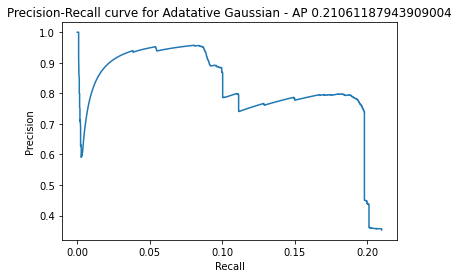

In [81]:
recs, precs, aps = ap_wo_conf(gt_notParked, singleGaussianDetections)
plot_prec_recall_curve(np.mean(precs, axis=0), recs[0], f'Precision-Recall curve for Adatative Gaussian - AP {np.mean(aps)}')

In [11]:
gt_1000 = {}
for frame in range(530,1100):
    if str(frame) in gt_notParked and len(gt_notParked[str(frame)]) > 0:
        gt_1000[str(frame)] = gt_notParked[str(frame)]

In [17]:
alphas = np.linspace(1.0, 3.0, num=6)
rhos = np.linspace(0.05, 0.3, num=4)
scores = {}
overAll_aps = {}
for id, alpha in enumerate(alphas):
    precs, recs, lables = [], [], []
    overAll_aps[id] = {'alpha':alpha, 'res':[]}
    for r in rhos:
        singleGaussianDetections = remove_background_adaptative(means,stds, data_path + 'vdo.avi',data_path + 'roi.jpg',alpha,2.0,r)
        rec, prec, ap,  tp_gauss, IoU_tp, IoU = voc_eval(gt_1000,singleGaussianDetections)
        overAll_aps[id]['res'].append((r, ap))
        # print(f'With Alpha {alpha:.3f} rho {r:.3f} the AP is {ap:.3f}')
        lables.append(f'Alpha {alpha:.3f} Rho {r:.3f}')
        precs.append(prec)
        recs.append(rec)
    scores[id] = [alpha, precs, recs, lables]

 51%|█████▏    | 1101/2141 [01:06<01:03, 16.51it/s]


In [19]:
print(overAll_aps)

{0: {'alpha': 1.0, 'res': [(0.05, 0.015978217117848602), (0.13333333333333333, 0.019162294775384857), (0.21666666666666667, 0.025346074072623036), (0.3, 0.021430572310250258)]}, 1: {'alpha': 1.4, 'res': [(0.05, 0.08544461003477398), (0.13333333333333333, 0.036651944546681386), (0.21666666666666667, 0.03667107588879112), (0.3, 0.03565032162957721)]}, 2: {'alpha': 1.8, 'res': [(0.05, 0.1156885308784043), (0.13333333333333333, 0.09205983889528194), (0.21666666666666667, 0.04645163800122078), (0.3, 0.04207415071187136)]}, 3: {'alpha': 2.2, 'res': [(0.05, 0.12297041127503502), (0.13333333333333333, 0.1318972622574681), (0.21666666666666667, 0.07360467950280282), (0.3, 0.04391356470498315)]}, 4: {'alpha': 2.6, 'res': [(0.05, 0.18368113231275962), (0.13333333333333333, 0.22207574085431175), (0.21666666666666667, 0.11571191121007908), (0.3, 0.11220418101172541)]}, 5: {'alpha': 3.0, 'res': [(0.05, 0.23443329660345263), (0.13333333333333333, 0.29903923918357733), (0.21666666666666667, 0.22977805

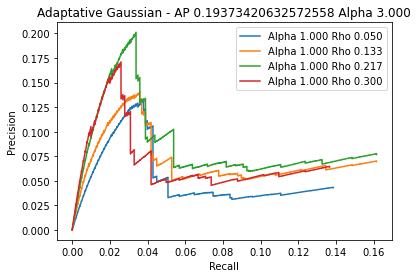

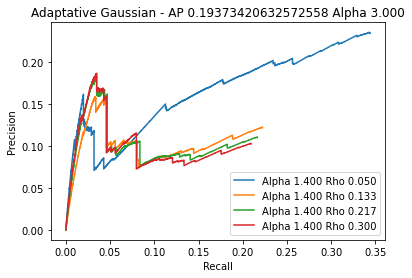

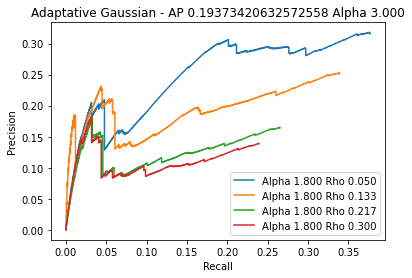

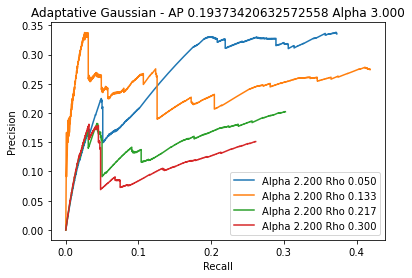

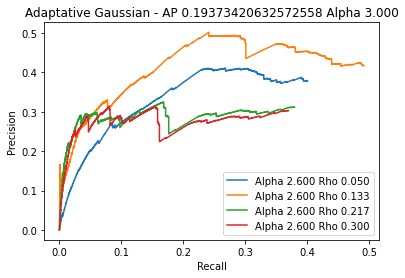

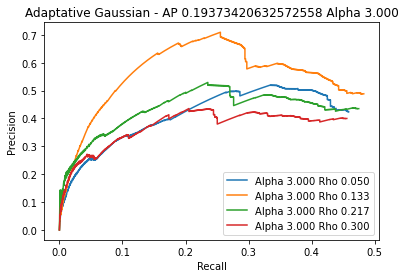

In [18]:
for id, values in scores.items():
    plot_multiple_prec_recall_curves(values[1], values[2], values[3], f'Adaptative Gaussian - AP {ap} Alpha {alpha:.3f}')

In [4]:
maxH, maxW = 0,0
minH, minW = 1900, 1900
for frame, objs in gt_notParked.items():
    for ob in objs:
        if ob.w > maxW:
            maxW = ob.w
        if ob.h > maxH:
            maxH = ob.h
        if ob.w < minW:
            minW = ob.w
        if ob.h < minH:
            minH = ob.h
print('Maximos: ',maxW, maxH)
print('Minimos: ',minW, minH)

Maximos:  592.55 441.0400000000001
Minimos:  29.03 12.809999999999945
